In [19]:
import pyradex
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='w'

In [20]:
pyradex.__path__

['/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex']

In [21]:
data = '/orange/adamginsburg/cmz/g5/code/'

In [22]:
import sys
sys.executable

'/orange/adamginsburg/miniconda3/envs/python39/bin/python'

In [23]:
R = pyradex.Radex(density=10**5, column=10**15, temperature=50, species='sio', datapath=data)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "


In [24]:
Tlvg = R(escapeProbGeom='lvg')
Tlvg

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:968: RuntimeWarning: invalid value encountered in true_divide
  frac_level_diff = level_diff/self.level_population


Tex,tau,frequency,upperstateenergy,upperlevel,lowerlevel,upperlevelpop,lowerlevelpop,brightness,T_B
K,,GHz,K,,,,,erg / (cm2 Hz s sr),K
float64,float64,float64,float64,bytes6,bytes6,float64,float64,float64,float64
43.00127043761652,1.6551126000974052,43.423853,2.08,01,00,0.08887736421923301,0.031096939370898864,1.8814463305880553e-14,32.47605365459304
38.87877786030384,6.776549531318966,86.846985,6.25,02,01,0.1330701596849882,0.08887736421923301,8.257497311145349e-14,35.63420519567343
37.340311997153876,13.843238069818273,130.268683,12.5,03,02,0.15757756362185393,0.1330701596849882,1.7516230636607365e-13,33.59609010935477
37.58801347625897,20.1529917602968,173.688238,20.84,04,03,0.16230317399422695,0.15757756362185393,3.073500959343751e-13,33.16046879773295
36.18337967090943,25.386539729231924,217.104919,31.26,05,04,0.14873642779677212,0.16230317399422695,4.4875517508389066e-13,30.98833701318935
33.51212300554245,28.42799825707387,260.518009,43.76,06,05,0.1210428844252477,0.14873642779677212,5.738125559477095e-13,27.518367974592817
29.562182976653645,28.566256610346066,303.926812,58.35,07,06,0.08527102613157889,0.1210428844252477,6.469563663579779e-13,22.79633808098519
24.270021493757877,25.43467910467738,347.330581,75.02,08,07,0.04862666783083065,0.08527102613157889,6.243387188244012e-13,16.84466393116842


\begin{equation}
    N_{\ce{SiO}} = 1.54 \times 10^{10} \times T \times \exp(31.26/T) \times I_{\ce{SiO} (5-4)} 
    %# N_sio(total) [cm^-2] = (1.54e10)*(T*exp(31.26/T))*I_sio54(K km/s)
    \label{eq:siocoldense}
\end{equation}

In [5]:
def Nsio(T, I):
    return 1.54e10 * T * np.exp(31.26/T) * I
def I(T, Nsio):
    return Nsio / (1.54e10 * T * np.exp(31.26/T))

In [6]:
densities = np.logspace(1, 7, 10)
TBs = [R(density=density)['T_B'][4] for density in densities]
TBs

[0.008046827077233478,
 0.044108222588507974,
 0.2804410921545421,
 2.0344422760116134,
 8.057223901181704,
 18.85903399225379,
 30.98833701318935,
 39.563062693965634,
 43.22498670952838,
 44.364137127235054]

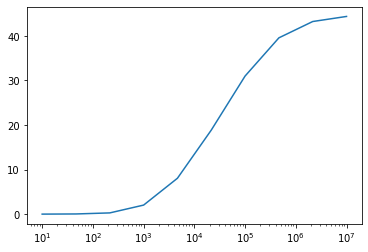

In [7]:
plt.semilogx(densities, TBs)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:968: RuntimeWarning: invalid value encountered in true_divide
  frac_level_diff = level_diff/self.level_population


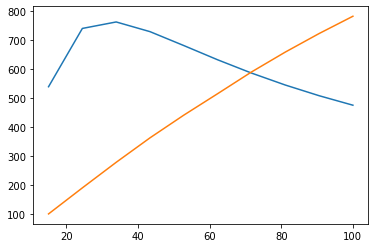

In [8]:
tems = np.linspace(15, 100, 10)
density = 1e6
TBs = [R(density=density, temperature=tem, column=1e15)['T_B'][4] for tem in tems]
plt.plot(tems, I(tems, 1e15))
plt.plot(tems, np.array(TBs)*10)

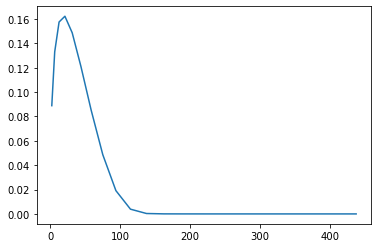

In [9]:
Tlvg

plt.plot(Tlvg['upperstateenergy'],Tlvg['upperlevelpop'])
#plt.yscale('log')

In [10]:
densities = np.linspace(10**2, 10**8, 10) # cm-3
column_densities = np.linspace(10**(22), 10**(23), 10)
temperatures = np.linspace(10, 100, 10)

Ra = pyradex.Radex(total_density=10**2, column=10**17, temperature=50, species='SiO', datapath=data)

In [11]:
import sys

In [12]:
sys.version

'3.9.7 (default, Sep 16 2021, 13:09:58) \n[GCC 7.5.0]'